# Programming Assignment



**Loading data**

Mounting data to google colab from google drive. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Required libraries**


In [2]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt

**DataFrame Reading**

Data is now stored in a pandas dataframe

In [3]:
path = "/content/drive/MyDrive/trimester-3_1st-yr/Sns/PA_eel2010/data.csv" # Paste location of data stored in your google drive here.
df = pd.read_csv(path)
y=np.array(df["y[n]"])
x=df["x[n]"]

In [4]:
df

,x[n],y[n]
0,35.4312,33.3735
1,35.1511,34.3744
2,34.8284,35.7514
3,34.4656,35.5869
4,34.0656,36.0826
...,...,...
188,31.4198,33.5967
189,31.7396,31.7135
190,32.0228,32.6819
191,32.2673,30.9260


Describing **h[n]**, Impulse response for the system from x[n] to y[n] in which blur happened.

In [5]:
h = [ 1/16, 4/16, 6/16, 4/16, 1/16]
h = np.array(h)

**Code for DFT**

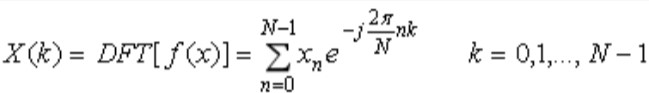

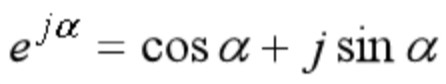

In [6]:
def dft(x,N,n1,n2):
  yr, yi =  [], []
  for k in range(N):
    real, imag = 0, 0
    for n in range(n1,n2):
      theta = -k * (2 * math.pi) * (float(n) / N)
      real += x[n] * math.cos(theta)
      imag += x[n] * math.sin(theta)
    yr.append(real)
    yi.append(imag)
    
  yr=np.array(yr)
  yi=np.array(yi)
  y=yr+1j*yi
  return y

**Code for IDFT**

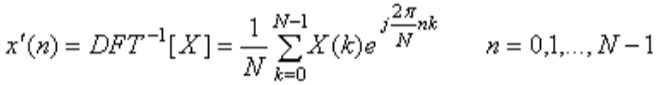

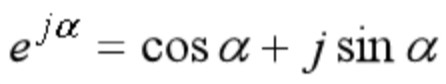

In [7]:
def idft(y):
  yr=[]
  yi=[]
  for i in range(len(y)):
    yr.append(y[i].real)
    yi.append(y[i].imag)
  
  N, x = len(yr), []
  for n in range(N):
    real, imag = 0, 0
    for k in range(N):
      theta = k * (2 * math.pi) * (float(n) / N)
      real += (yr[k] * math.cos(theta)) - (yi[k] * math.sin(theta))
      # imag += (yr[k] * math.sin(theta)) + (yi[k] * math.cos(theta))
      
    x.append(real/N)
  return x

**Denoising**

Main strategy for removing noise is to average the same color pixels.


In [8]:
y = y.tolist()
def denoising(y):
  # Here we inserted two 0s on both terminal of the list. So that we can smoothly compute the average of consecutive 5 entities of the y[n] array, especially at 0 and n-1 index.
  y.insert(0,0)
  y.append(0)
  y.insert(0,0)
  y.append(0)
  y1 = []
  for i in range(2,len(y)-2):
    y1.append((y[i-2]+y[i-1]+y[i]+y[i+1]+y[i+2])/5) # We had taken kernal value to be 5. 
  return(np.array(y1))

**1. First remove noise and then sharpen (deblur). Let the resulting signal be x1[n].**

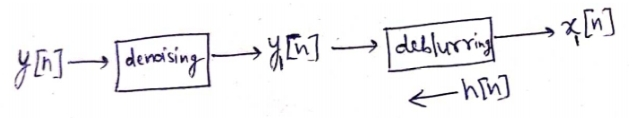

In [9]:
# Denoising 
y1 = denoising(y) 

# Deblurring 
dft_y = dft(y1, 193, 0,193 ) # DFT of y1[n]
dft_h = dft(h, 193, -2, 3) # DFT of h[n]

temp = dft_y / dft_h 
x1 = idft(temp) # IDFT of (dft_y/dft_h)

print(x1) # x1[n]


[35.3444951038322, 35.936105408950766, 34.74768215567162, 35.90768355883997, 33.51835050667317, 32.95157121452216, 34.14203277735332, 32.346243157097106, 35.16643404185714, 31.06732110112404, 31.511228891127192, 30.566523724431125, 27.61654968220134, 30.213621105528667, 26.720530241944836, 28.261006894282293, 27.743370087112712, 24.88218385441204, 28.357969257419036, 26.001961293505065, 27.574458377188346, 27.879530043294533, 25.367747715250275, 28.33646024291858, 24.11649040138331, 26.45635955873305, 27.425345694178, 23.958632921013173, 29.752670185397918, 26.701569191120406, 28.20442869359124, 29.261360961905318, 25.905938116906054, 28.526912750021914, 25.53074328097595, 27.242326432486863, 28.96315264625454, 27.31375782430613, 31.808251028408314, 29.61005549183812, 30.46781657625029, 31.997804218109597, 29.389242766960184, 32.271698439726165, 28.235875615843018, 31.291557391983396, 31.736579157876605, 28.68322258710026, 32.62775874800943, 28.72705942037471, 27.749524133989894, 31.11

**2. First sharpen (deblur) and then remove noise. Let the resulting signal be x2[n].**


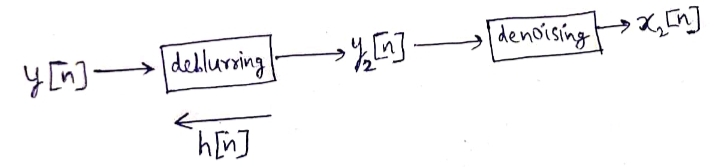

In [10]:
# Deblurring 
dft_y = dft(y, 193, 0, 193) # DFT of y[n]
dft_h = dft(h, 193, -2, 3) # DFT of h[n]

temp = dft_y / dft_h 
y2 = idft(temp) # IDFT of (dft_y/dft_h)

# Denoising 
x2 = denoising(y2)

print(x2) # x2[n]


[14.8101362  28.20745875 34.97811189 35.44823199 35.91427911 34.50511531
 34.61479156 32.59331619 33.61015909 33.57618666 33.70551003 32.19432246
 31.16257658 29.98794522 28.91274204 28.69236791 27.87835241 27.92354004
 27.11524591 26.24763923 26.77437006 27.19082171 27.24987397 27.19887718
 26.80559542 26.68845532 25.33655919 26.14647518 26.68903296 25.4721208
 28.0381576  27.95296467 27.9111892  28.46610274 27.49843595 26.74374913
 26.8135272  26.96781086 28.10550243 28.98876079 29.95425254 30.92422795
 30.21424545 31.07414793 31.15037489 30.34464192 29.5813697  31.06130031
 30.74312824 30.53424029 30.62538301 30.10373547 27.54510774 30.04848576
 28.08211164 27.84159971 29.1188448  27.5630486  26.39411949 26.81658362
 27.44408843 26.2020596  26.31454014 24.56372621 23.13672117 23.02605861
 23.32304863 23.39505271 22.56261431 22.30420671 20.15094909 20.46581768
 21.26792014 21.84602639 22.64135204 22.13990873 22.08965821 22.41405664
 22.8715745  23.47019092 22.7955347  22.31698914 22.

**Comparing Plot for x[n], x1[n] and x2[n].**

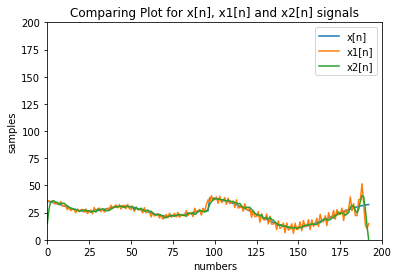

In [11]:
num=list(range(0,193))
plt.plot(num,x,label='x[n]') # plot for x[n]
plt.plot(num,x1,label='x1[n]') # plot for x1[n]
plt.plot(num,x2,label='x2[n]') # plot for x2[n]
plt.axis([0,200,0,200])
plt.title("Comparing Plot for x[n], x1[n] and x2[n] signals")
plt.xlabel("numbers")
plt.ylabel("samples")
plt.legend()
plt.show()

**Conclusion**

We have observed that plot of x2[n] is more accurate than x1[n]. 